In [372]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [515]:
from DatasetHandler import DatasetHandler
from Model import CNNSpeckleFilter
from utils import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt

In [374]:
handler = DatasetHandler('dataset_v2')
print("Training dataset size: ", len(handler.train_paths))
print("Validation dataset size: ", len(handler.val_paths))
print("Testing dataset size: ", len(handler.test_paths))

Training dataset size:  2000
Validation dataset size:  600
Testing dataset size:  37


In [375]:
speckle_filter = CNNSpeckleFilter(input_shape=(256,256,1), n_layers=30)
speckle_filter.model.load_weights('weights/new_model_30.h5')

In [620]:
import matplotlib.pyplot as mpl
mpl.rcParams['font.size'] = 16

## Test 1

In [702]:
img_raw = handler.load(handler.train_paths[17])
img = handler.reject_outliers(img_raw, 99.99)
img = handler.min_max(img)

s, n = handler.add_speckle(img_raw, looks = 4)
s = handler.reject_outliers(s, 99.7)
s = handler.min_max(s)

p = speckle_filter.model.predict(s[np.newaxis, ...])[0,...]
p = handler.min_max(p)

#-------------------------------------------------------------
looks = 4
gamma_shape = looks
gamma_scale = 1/looks
#define three Gamma distributions
t = np.linspace(0, 4, num = 100)
n = stats.gamma.pdf(t, a=gamma_shape, scale=gamma_scale)

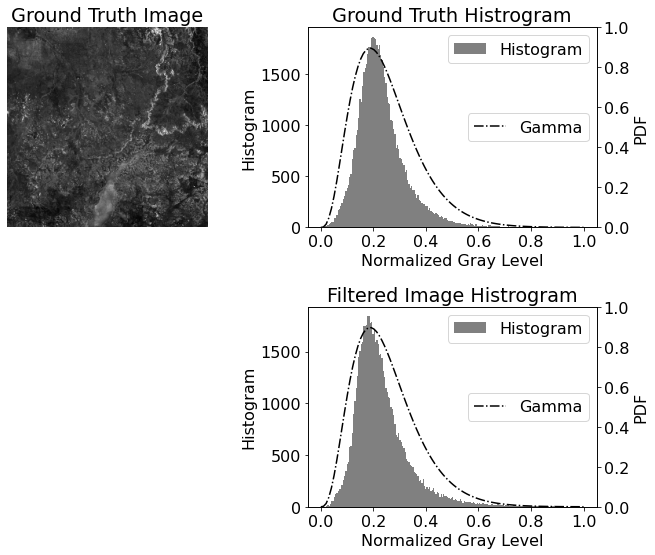

In [703]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

axes[0,0].imshow(img, cmap = 'gray')
axes[0,0].set_title('Ground Truth Image')
axes[0,0].axis(False)

axes[0,1].hist(img.flatten(), 200, [0.01,0.99], label = 'Histogram', color='gray')
axes[0,1].set_xlabel('Normalized Gray Level')
axes[0,1].set_ylabel('Histogram')
axes[0,1].legend(loc=0)
axes[0,1].set_title('Ground Truth Histrogram')
ax2 = axes[0,1].twinx()
ax2.plot(t/4, n, '-.', color = 'black',label = 'Gamma')
ax2.set_ylim([0,1])
ax2.set_ylabel('PDF')
ax2.legend(loc=5)

axes[1,0].imshow(np.ones((256,256,3)))
axes[1,0].axis(False)


axes[1,1].hist(p.flatten(), 200, [0.01,0.99], label = 'Histogram', color='gray')
axes[1,1].set_xlabel('Normalized Gray Level')
axes[1,1].set_ylabel('Histogram')
axes[1,1].set_title('Filtered Image Histrogram')
axes[1,1].legend(loc=0)
ax3 = axes[1,1].twinx()
ax3.plot(t/4, n, '-.', color = 'black', label = 'Gamma')
ax3.set_ylim([0,1])
ax3.set_ylabel('PDF')
ax3.legend(loc=5)

fig.tight_layout()
plt.show()

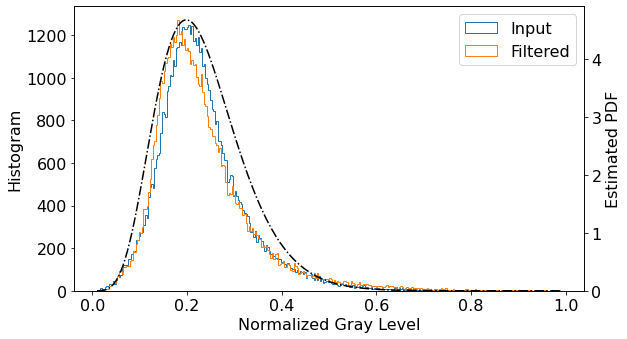

In [708]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9,5))


ax.hist(img.flatten(), 300, [0.01,0.99], label = 'Input', histtype ='step')
ax.set_xlabel('Normalized Gray Level')
ax.set_ylabel('Histogram')

ax.hist(p.flatten(), 300, [0.01,0.99], label = 'Filtered', histtype ='step')
ax.set_xlabel('Normalized Gray Level')

ax3 = ax.twinx()
ax3.plot(bins, best_fit_line, '-.', color = 'black', label = 'Gamma')
ax3.set_ylim([0,None])
ax3.set_ylabel('Estimated PDF')


ax.legend(loc=0)

fig.tight_layout()
plt.show()

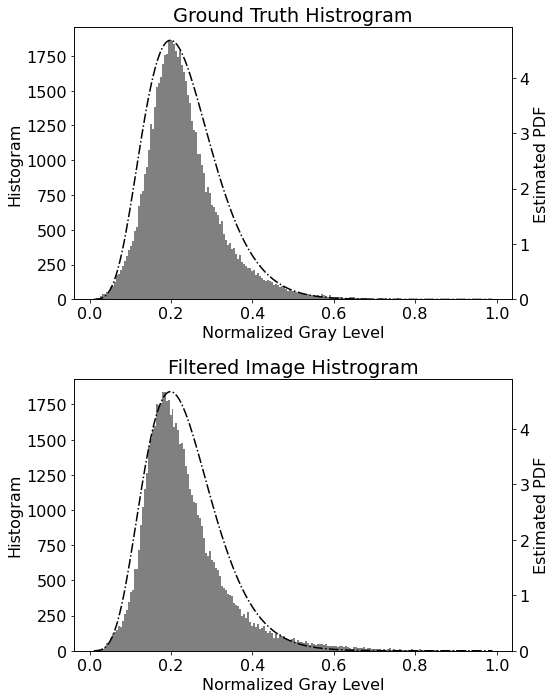

In [712]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (8,10))

_, bins, _ = axes[0].hist(img.flatten(), 200, [0.01,0.99], label = 'Histogram', color='gray', density = False)
axes[0].set_xlabel('Normalized Gray Level')
axes[0].set_ylabel('Histogram')
axes[0].set_title('Ground Truth Histrogram')

params = scipy.stats.gamma.fit(img.flatten())
best_fit_line = scipy.stats.gamma.pdf(bins, params[0], params[1], params[2])
ax3 = axes[0].twinx()
ax3.plot(bins, best_fit_line, '-.', color = 'black', label = 'Gamma')
ax3.set_ylim([0,None])
ax3.set_ylabel('Estimated PDF')


axes[1].hist(p.flatten(), 200, [0.01,0.99], label = 'Histogram', color='gray', density = False)
axes[1].set_xlabel('Normalized Gray Level')
axes[1].set_ylabel('Histogram')
axes[1].set_title('Filtered Image Histrogram')
ax3 = axes[1].twinx()
params = scipy.stats.gamma.fit(img.flatten())
best_fit_line = scipy.stats.gamma.pdf(bins, params[0], params[1], params[2])
ax3.plot(bins, best_fit_line, '-.', color = 'black', label = 'Gamma')
ax3.set_ylim([0,None])
ax3.set_ylabel('Estimated PDF')


fig.tight_layout()
plt.show()

## Test 2

In [640]:
img_raw = handler.load(handler.train_paths[39])
img = handler.reject_outliers(img_raw, 99.3)
img = handler.min_max(img)

s, n = handler.add_speckle(img_raw, looks = 4)
s = handler.reject_outliers(s, 99)
s = handler.min_max(s)

p = speckle_filter.model.predict(s[np.newaxis, ...])[0,...]
p = handler.min_max(p)

#-------------------------------------------------------------
looks = 4
gamma_shape = looks
gamma_scale = 1/looks
#define three Gamma distributions
t = np.linspace(0, 4, num = 100)
n = stats.gamma.pdf(t, a=gamma_shape, scale=gamma_scale)

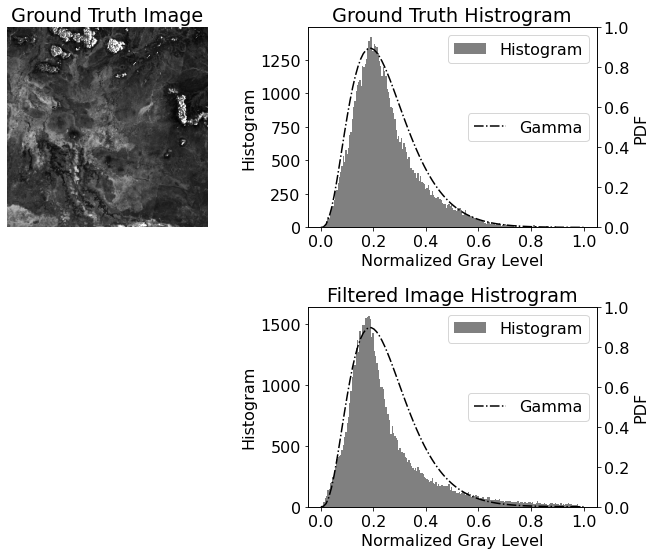

In [641]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

axes[0,0].imshow(img, cmap = 'gray')
axes[0,0].set_title('Ground Truth Image')
axes[0,0].axis(False)

axes[0,1].hist(img.flatten(), 200, [0.01,0.99], label = 'Histogram', color='gray')
axes[0,1].set_xlabel('Normalized Gray Level')
axes[0,1].set_ylabel('Histogram')
axes[0,1].legend(loc=0)
axes[0,1].set_title('Ground Truth Histrogram')
ax2 = axes[0,1].twinx()
ax2.plot(t/4, n, '-.', color = 'black',label = 'Gamma')
ax2.set_ylim([0,1])
ax2.set_ylabel('PDF')
ax2.legend(loc=5)

axes[1,0].imshow(np.ones((256,256,3)))
axes[1,0].axis(False)


axes[1,1].hist(p.flatten(), 200, [0.01,0.99], label = 'Histogram', color='gray')
axes[1,1].set_xlabel('Normalized Gray Level')
axes[1,1].set_ylabel('Histogram')
axes[1,1].set_title('Filtered Image Histrogram')
axes[1,1].legend(loc=0)
ax3 = axes[1,1].twinx()
ax3.plot(t/4, n, '-.', color = 'black', label = 'Gamma')
ax3.set_ylim([0,1])
ax3.set_ylabel('PDF')
ax3.legend(loc=5)

fig.tight_layout()
plt.show()

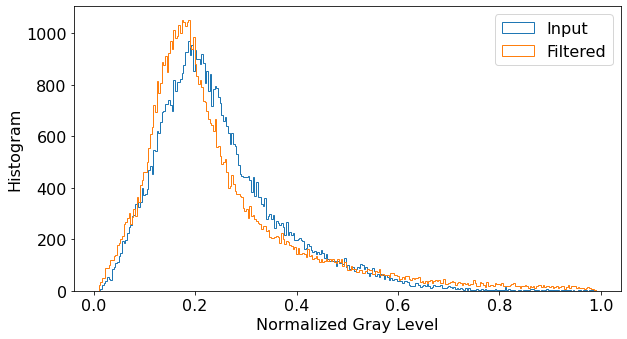

In [661]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9,5))


ax.hist(img.flatten(), 300, [0.01,0.99], label = 'Input', histtype ='step')
ax.set_xlabel('Normalized Gray Level')
ax.set_ylabel('Histogram')

ax.hist(p.flatten(), 300, [0.01,0.99], label = 'Filtered', histtype ='step')
ax.set_xlabel('Normalized Gray Level')

ax.legend(loc=0)

fig.tight_layout()
plt.show()

In [687]:
import scipy


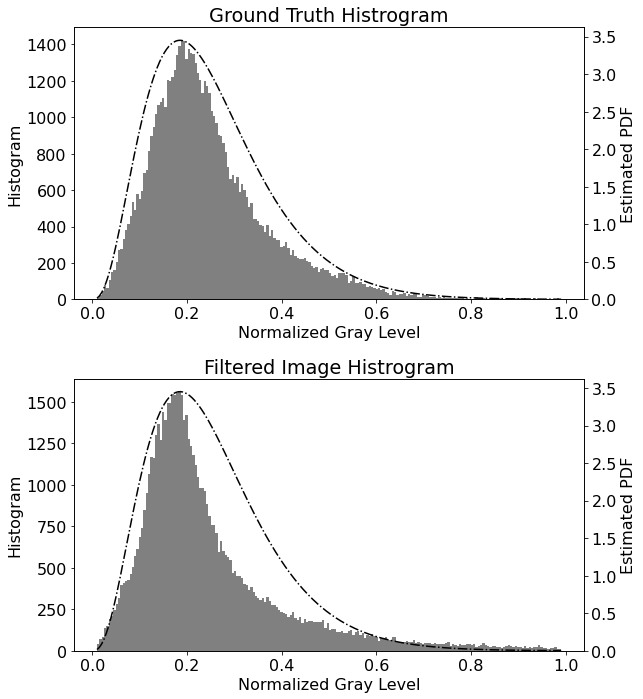

In [701]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (9,10))

_, bins, _ = axes[0].hist(img.flatten(), 200, [0.01,0.99], label = 'Histogram', color='gray', density = False)
axes[0].set_xlabel('Normalized Gray Level')
axes[0].set_ylabel('Histogram')
axes[0].set_title('Ground Truth Histrogram')

params = scipy.stats.gamma.fit(img.flatten())
best_fit_line = scipy.stats.gamma.pdf(bins, params[0], params[1], params[2])
ax3 = axes[0].twinx()
ax3.plot(bins, best_fit_line, '-.', color = 'black', label = 'Gamma')
ax3.set_ylim([0,None])
ax3.set_ylabel('Estimated PDF')




axes[1].hist(p.flatten(), 200, [0.01,0.99], label = 'Histogram', color='gray', density = False)
axes[1].set_xlabel('Normalized Gray Level')
axes[1].set_ylabel('Histogram')
axes[1].set_title('Filtered Image Histrogram')
ax3 = axes[1].twinx()
ax3.plot(bins, best_fit_line, '-.', color = 'black', label = 'Gamma')
ax3.set_ylim([0,None])
ax3.set_ylabel('Estimated PDF')


fig.tight_layout()
plt.show()

# Edges Preservation Evaluation

In [618]:
from scipy import ndimage
import cv2

def get_edges(img):
    # Get x-gradient in "sx"
    sx = ndimage.sobel(img,axis=0,mode='constant')
    # Get y-gradient in "sy"
    sy = ndimage.sobel(img,axis=1,mode='constant')
    # Get square root of sum of squares
    sobel=np.hypot(sx,sy)
    
    return sobel

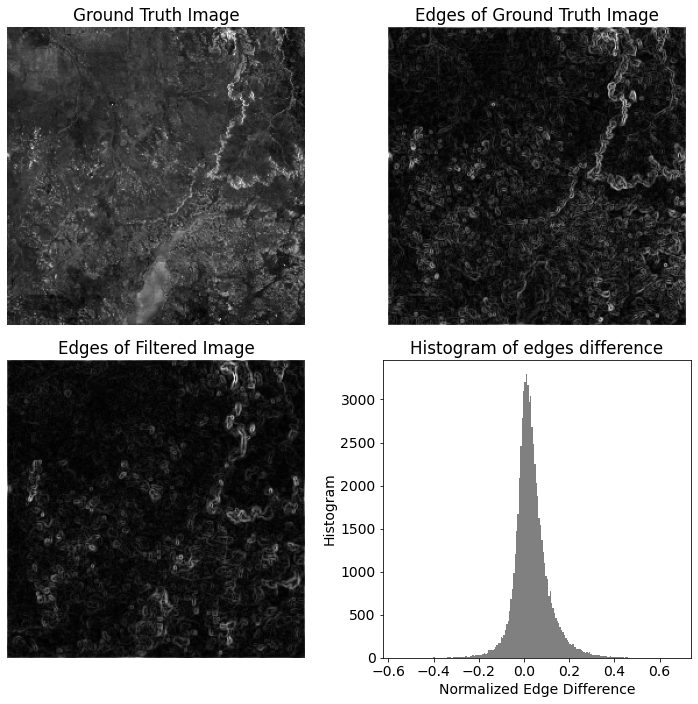

In [619]:
gt = get_edges(img)
gt = cv2.normalize(gt, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
pre = get_edges(p)
pre = cv2.normalize(pre, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
diff = gt-pre
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

axes[0,0].imshow(img,cmap=plt.cm.gray)
axes[0,0].axis(False)
axes[0,0].set_title('Ground Truth Image')

axes[0,1].imshow(gt,cmap=plt.cm.gray)
axes[0,1].axis(False)
axes[0,1].set_title('Edges of Ground Truth Image')

axes[1,0].imshow(pre,cmap=plt.cm.gray)
axes[1,0].axis(False)
axes[1,0].set_title('Edges of Filtered Image')

axes[1,1].hist(diff.flatten(),  200, label = 'Histogram', color='gray')
axes[1,1].set_title('Histogram of edges difference')
axes[1,1].set_xlabel('Normalized Edge Difference')
axes[1,1].set_ylabel('Histogram')

fig.tight_layout()
plt.show()
    
    